### Imports

In [2]:
# My first pytorch project to build a simple network to do something...
# https://github.com/zalandoresearch/fashion-mnist
# https://pytorch.org/docs/stable/torchvision/datasets.html#mnist
# http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/#  <- performance results!

import matplotlib.pyplot as plt
import torch
import numpy as np
from PIL import Image
from IPython.display import clear_output
import torch.optim as optim
from torch.nn.init import xavier_normal_ 


%matplotlib inline


### The data
<img src="https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png" style="width: 700px;" />

In [3]:
# Grab the data
    
import torchvision.datasets as dset
import torchvision.transforms as transforms

xt = transforms.Compose([
     #transforms.CenterCrop(10),
     transforms.ToTensor(),
])

#torchvision.datasets.CIFAR10(root, train=True, transform=None, target_transform=None, download=False)

#transform=transforms.ToTensor()
train_fm_set = dset.FashionMNIST(root = '/data/work/osa/2018-10-pytorch/fashion_mnist_data', 
                                 download=True, transform=xt)
test_fm_set = dset.FashionMNIST(root='/data/work/osa/2018-10-pytorch/fashion_mnist_data', train=False, 
                         download=True, transform=xt) #transform=trans

batch_size = 64

# https://pytorch.org/docs/stable/data.html
train_fm_loader = torch.utils.data.DataLoader(
                 dataset=train_fm_set,
                 batch_size=batch_size,
                 shuffle=True)
test_fm_loader = torch.utils.data.DataLoader(
                dataset=test_fm_set,
                batch_size=batch_size,
                shuffle=False)


print('Number of Training samples: ', len(train_fm_set))
print('Number of Test samples: ',     len(test_fm_set))
print('Batch Size : ',                batch_size)
print('==>>> total training batches : {}'.format(len(train_fm_loader)))
print('==>>> total testing batches : {}'.format(len(test_fm_loader)))
#print('type {}'.format(type(train_fm_loader)))


Number of Training samples:  60000
Number of Test samples:  10000
Batch Size :  64
==>>> total training batches : 938
==>>> total testing batches : 157


In [4]:
type(train_fm_set)


torchvision.datasets.mnist.FashionMNIST

In [5]:
# (batch, channel, height , width)

In [6]:
# Quick test ....

for i, (images, labels) in enumerate(train_fm_loader):
    print("i={}, image_size={} labels_size={}\nlabels={}".format(i,images.size(), labels.size(), labels))
    print()
    #print(i,images.size(), labels.size(), labels)
    if(i==2):
        break

i=0, image_size=torch.Size([64, 1, 28, 28]) labels_size=torch.Size([64])
labels=tensor([4, 1, 6, 0, 3, 3, 5, 9, 4, 4, 0, 5, 3, 6, 8, 4, 5, 5, 0, 2, 2, 4, 7, 3,
        9, 5, 9, 1, 6, 3, 4, 4, 5, 1, 6, 7, 6, 1, 5, 8, 2, 5, 5, 3, 6, 1, 2, 4,
        1, 4, 6, 6, 2, 7, 2, 4, 4, 3, 2, 6, 2, 9, 2, 2])

i=1, image_size=torch.Size([64, 1, 28, 28]) labels_size=torch.Size([64])
labels=tensor([6, 0, 6, 1, 5, 5, 4, 6, 5, 4, 9, 8, 0, 6, 9, 9, 7, 6, 1, 2, 7, 0, 4, 0,
        6, 0, 6, 5, 7, 5, 4, 0, 6, 2, 7, 5, 1, 4, 2, 2, 1, 8, 5, 9, 9, 7, 7, 6,
        7, 0, 5, 4, 0, 7, 3, 2, 2, 6, 9, 4, 1, 3, 7, 0])

i=2, image_size=torch.Size([64, 1, 28, 28]) labels_size=torch.Size([64])
labels=tensor([2, 3, 1, 6, 9, 0, 7, 1, 0, 2, 2, 1, 6, 1, 2, 0, 9, 9, 5, 1, 4, 1, 3, 6,
        4, 3, 3, 3, 8, 7, 6, 3, 0, 9, 6, 5, 3, 6, 0, 1, 3, 5, 2, 3, 0, 4, 8, 1,
        1, 6, 0, 3, 6, 9, 6, 9, 5, 4, 2, 5, 8, 3, 6, 7])



### Labels 0-10 mapping

In [7]:
labels_map = {
    0:"T-shirt/top",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle boot"
}

In [8]:
# Visualize a single image .....

In [9]:
# Peal off a Single Element from training set
example_x=train_fm_set[0][0]
example_y=train_fm_set[0][1]

#np.asarray(a)
print(example_x.shape,example_y)


torch.Size([1, 28, 28]) tensor(9)


In [10]:
# Add a batch dimension onto x for later inferencing
x = torch.tensor(np.asarray(example_x), dtype=torch.float32)
x = x.unsqueeze(0) # add an batch dimension
y = example_y
print(x.size())


torch.Size([1, 1, 28, 28])


### Plot an image 


torch.Size([28, 28])


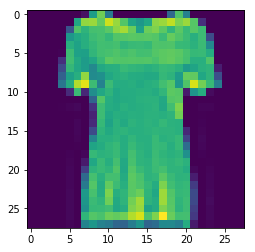

In [11]:
#https://pillow.readthedocs.io/en/5.3.x/
# load 4th sample

def plot_image(pil_image) :
    #pil_im = Image.open('data/empire.jpg', 'r')
    #imshow(fm_dset[3])  
    print(pil_image.shape)
    plt.imshow(pil_image)


#print(type(train_fm_set[0][0]))
# idx,xval
IMG=10
plot_image(train_fm_set[IMG][0].squeeze(0))

### Define a couple of  models

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# class torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)

class NetCNN(nn.Module):

    def __init__(self):
        super(NetCNN, self).__init__()
        self.name = "NetCNN"

        # 1 input image channel, 8 output channels, 5x5 square convolution [28x28 image]
        self.conv1 = nn.Conv2d(1, 8, 5)
        
        self.drop1 = nn.Dropout2d(p=0.33)
        # 8 input image channel, 16 output channels, 3x3 square convolution[14x14 image]
        self.conv2 = nn.Conv2d(8, 16, 3)
        self.drop2 = nn.Dropout2d(p=0.33)
        
        # 16 input image channel, 32 output channels, 2x2 square convolution[7x7 image]
        self.conv3 = nn.Conv2d(16, 32, 2)
        self.drop3 = nn.Dropout2d(p=0.33)
        
        # an affine operation: y = Wx + b
        # 
        self.fc1 = nn.Linear(512, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        self.layer1 = F.max_pool2d(F.relu(self.drop1(self.conv1(x))), (2, 2))
        # If the size is a square you can only specify a single number
        self.layer2 = F.max_pool2d(F.relu(self.drop2(self.conv2(self.layer1))), 2)
        
        self.layer3 = F.relu(self.drop3(self.conv3(self.layer2)))
      
        # Flatten and add a few FC layers...
        x = self.layer3.view(-1, self.num_flat_features(self.layer3))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features




In [13]:
class NetFC(nn.Module):
    
    def __init__(self):
        super(NetFC, self).__init__()
        # an affine operation: y = Wx + b
        self.name = "NetFC"
        self.fc1 = nn.Linear(784, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window      
        # Flatten and add a few FC layers...
        x = x.view(-1,784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


### Inspect the # of model parameters

In [14]:
# dir(net)
# Let print out the parameters !!

def summary(net) :
    print(net.children)
    for (ln,i) in net.named_parameters() :
        print(ln, i.size(),np.prod(np.asarray(i.size())))

### Quick inference test using an image ...

In [15]:
# input = x
# print(type(input))
# print(input.size())
#x.size()
#x.view(-1,784).size()

In [16]:
# Quick Test
# batch, c, h, w
# input = torch.randn(1, 3, 28, 28)

# yhat = net(x)
# # out = net.conv1(x)
# print(yhat.shape)
# print(torch.softmax(yhat,dim=1))
# print(yhat)

In [17]:
# Create a loss function
# net.zero_grad()  # Zero out the gradients of the network
# criterion = nn.MSELoss()
# y = torch.tensor([0,0,0,1,0,0,0,0,0,0],dtype=torch.float32).unsqueeze(0) # dummy target
# print(yhat.shape)
# print(y.shape)
# loss = criterion(yhat, y)
# print(loss)

In [18]:
# Example of tracing the network ....
# print(loss.grad_fn)  # MSELoss
# print(loss.grad_fn.next_functions[0][0])  # Linear
# print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [19]:
# Example of printing out the parameters

# net.zero_grad()     # zeroes the gradient buffers of all parameters
# 
# print('conv1.bias.grad before backward')
# print(net.conv1.bias.grad)
# loss.backward(retain_graph=True)
# 
# print('conv1.bias.grad after backward')
# print(net.conv1.bias.grad)

In [20]:
#for name, param in net.named_parameters():
#    if param.requires_grad:
#        print( name, param.data)

#net.fc1.weight.data
#net.

In [21]:

# assume yhat is [batch,10], and y is [batch,1] 
def accuracy(yhat,y) :
    #print(yhat)
    #print(y)    
    yhat = [np.int(i.argmax()) for i in yhat]
    yhat = np.asarray(yhat)
    y = np.asarray(y)
    #print(yhat.size, yhat)
    #print(y.size,y)
    num_correct = np.sum(np.where(y == yhat,1,0))
    #print("Num Correct = {} out of {}".format(num_correct, y.size))
    return num_correct
    

def weights_init(m):
    if isinstance(m, nn.Conv2d):
        xavier_normal_(m.weight.data)
    elif isinstance(m, nn.Linear) :
        xavier_normal_(m.weight.data)
        m.bias.data.fill_(0)
        #xavier_normal_(m.bias.data)

        
def train_test(epoch, train_fm_loader, batch_size, mode='train', viz_freq=3000):
    # training
    cm_loss = 0
    loss = 0
    cm_correct = cm_tot = running_acc = 0
    Y_onehot = torch.FloatTensor(batch_size, 10)

    for i,(X,Y) in enumerate(train_fm_loader):
        if(len(Y) == batch_size) :
            # viz_network(epoch, i,loss,running_acc,net) 
            optimizer.zero_grad()   # zero the gradient buffers
            yhat = net(X)
            #print(print(net.conv1.parameters))
            #parameters = net.conv1.parameters.flatten().detach().numpy()
            # In your for loop

            Y_onehot.zero_()
            #print(Y_onehot.size(),Y.size())
            Y_onehot.scatter_(1, Y.unsqueeze(1), 1)
            #print(Y_onehot,Y)
    
            #print(yhat.type(),Y_onehot.type())
            cm_correct += accuracy(yhat,Y)
            cm_tot += batch_size
            running_acc = cm_correct/cm_tot

            # MSE version loss = criterion(yhat, Y_onehot.float())
            # Crossentropy version
            loss = criterion(yhat, Y)
            
            cm_loss += np.float(loss)
            if(mode == 'train') :
                loss.backward()
                optimizer.step()    # Does the update
    
    cm_loss = cm_loss/cm_tot
    return (cm_loss,cm_correct,cm_tot)


In [32]:
# input = torch.randn(3, 5, requires_grad=True)
# target = torch.empty(3, dtype=torch.long).random_(5)
# 
# 
# yhat = net(x)
# print(y.unsqueeze(0).unsqueeze(0))
# Y_onehot = torch.LongTensor(1, 10)
# Y_onehot.zero_()
# Y_onehot.scatter_(1, y.unsqueeze(0).unsqueeze(0), 1)
# #https://pytorch.org/docs/master/nn.html#torch.nn.CrossEntropyLoss
# criterion = nn.CrossEntropyLoss()
# 
# 
# print("###########")
# print(input,target)
# print("###########")
# print(yhat,Y_onehot,y,y.unsqueeze(0))
# 
# loss = criterion(input, target)
# loss = criterion(yhat, y.unsqueeze(0))

In [23]:
x.shape

torch.Size([1, 1, 28, 28])

In [24]:
def viz_network(epoch, curves,net) :
    clear_output(True)
    
    plt.figure(figsize=[20,4])
    if(net.name == "NetCNN") :
        conv1_weights = net.conv1.weight.flatten().detach().numpy()
        conv2_weights = net.conv2.weight.flatten().detach().numpy()
        #print("epoch = {} i = {} loss= {} acc = {} num_cnv1w = {} cnv1w_avg = {}".format(epoch, i, loss,running_acc, len(conv1_weights), np.mean(conv1_weights)))
        plt.subplot(1,4,1)
        plt.hist(conv1_weights)
        plt.subplot(1,4,2)
        plt.hist(conv2_weights)    
    else :
        fc1_weights = net.fc1.weight.flatten().detach().numpy()
        fc2_weights = net.fc2.weight.flatten().detach().numpy()
        myVar = None   
        plt.subplot(1,4,1)
        plt.hist(fc1_weights)
        plt.subplot(1,4,2)
        plt.hist(fc2_weights)


    for key in curves:
        loss = [x[0] for x in curves[key]]
        acc =  [float(x[1]/x[2]) for x in curves[key]]
    
        #plt.scatter(range(len(curves[key])), curves[key], label=key, linewidths=1.0)
        ax1 = plt.subplot(1,4,3)
        #loss
        ax1.plot( loss, label=key)
        ax1.legend()
        ax1.set_title('Loss')
        ax1.set_xlabel('epoch')
        ax1.set_ylabel('Loss')
        #acc
        ax2 = plt.subplot(1,4,4)
        ax2.plot( acc, label=key)
        ax2.legend()
        ax2.set_title('Accuracy')
        ax2.set_xlabel('epoch')
        ax2.set_ylabel('% correct')
    plt.show()
       
#viz_network(0,curves,net)

In [25]:
# try:
#     net.conv1
# except AttributeError:
#     myVar = None   

In [26]:
# yhat = net(X)
# [y.argmax() for y in yhat]
# X.size()
# yhat.size()


#train_test('0',test_fm_loader, 'test')


### Training run

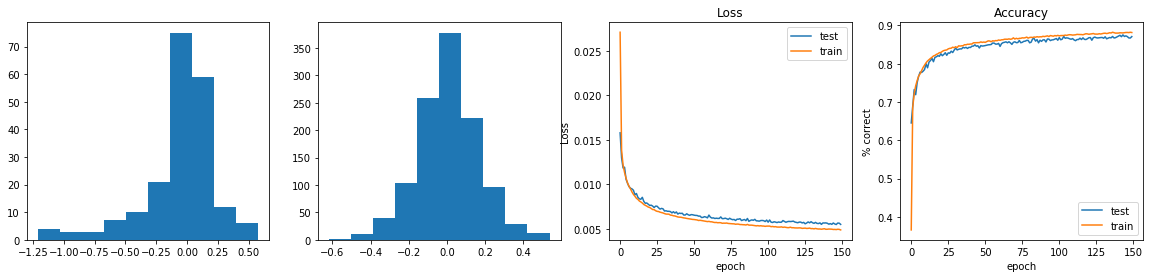

Epoch 149 Train loss = (0.0048902947578644785, 52869, 59968)
Epoch 149 Test loss = (0.005512686837345171, 8696, 9984)


In [37]:
# Training run here ...
reset_weights=True
net = NetCNN() #NetFC()  # NetCNN()

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

if(reset_weights) :
    net.apply(weights_init)
    
use_cuda = False
if use_cuda:
    net = net.cuda()

print(net)

# in your training loop:
curves = {'train' : [], 'test' : []}
viz_network(0,curves,net)

for epoch in range(150) :

    train_res = train_test(epoch, train_fm_loader, batch_size, mode='train')
    curves['train'].append(train_res)
    
    test_res = train_test(epoch, test_fm_loader,batch_size, mode='test')
    curves['test'].append(test_res)

    viz_network(epoch,curves,net)

    print("Epoch {} Train loss = {}".format(epoch, train_res))
    print("Epoch {} Test loss = {}".format(epoch, test_res))


In [ ]:
#curves['train'].append(8)
#curves

In [ ]:
#def save_model() :
#torch.save(net, 'network_test.pt')



#    # Print model's state_dict
#print("Model's state_dict:")
#for param_tensor in model.state_dict():
#    print(param_tensor, "\t", model.state_dict()[param_tensor].size())
#
## Print optimizer's state_dict
#print("Optimizer's state_dict:")
#for var_name in optimizer.state_dict():
#    print(var_name, "\t", optimizer.state_dict()[var_name])

In [ ]:
#net2 = torch.load('network_conv2d_150epoch.pt')
#net2
#net2(x)
#viz_parameters(net2.layer1)

torch.Size([28, 28])


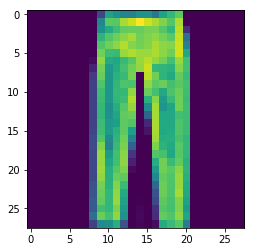

In [36]:
# Helper function to plot feature map

def viz_parameters(feature_map) :
    #    batch, filter, x,y
    dims = np.asarray(feature_map.size())
    num_filters = dims[1]
    print("Plotting {} feature maps".format(num_filters))
    plt.figure(figsize=(20,20))
    for filter in range(num_filters) :
        xy = feature_map[0][filter].detach().numpy()
        plt.subplot(4,4,filter+1)
        plt.imshow(xy, cmap='gray')
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    plt.show()

def viz_weights(weights) :
    #    batch, filter, x,y
    dims = np.asarray(weights.size())
    print("Weigths dims = {}".format(dims))
    num_filters = dims[0]
    print("Plotting {} feature maps".format(num_filters))
    plt.figure(figsize=(20,20))
    for filter in range(num_filters) :
        xy = weights[filter][0].detach().numpy()
        plt.subplot(4,4,filter+1)
        plt.imshow(xy, cmap='gray')
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    plt.show()

#    for key in curves:
#        #plt.scatter(range(len(curves[key])), curves[key], label=key, linewidths=1.0)
#        plt.plot( curves[key], label=key)
#
#    plt.legend()
#    plt.show()\


# Perform Inference sets internal network state!
# Peal off a Single Element from training set
#np.asarray(a)
IMG = 16
x = torch.tensor(np.asarray(train_fm_set[IMG][0]), dtype=torch.float32)
plot_image(x.squeeze(0))
x = x.unsqueeze(0) # add an batch dimension

if(net.name == "NetCNN") :
    net(x)
    viz_parameters(net.layer1)
    viz_parameters(net.layer2)



In [ ]:

clear_output(True)
plt.hist(sample_rewards,bins=20);
plt.vlines([np.percentile(sample_rewards,50)],[0],[100],label="50'th percentile",color='green')
plt.vlines([np.percentile(sample_rewards,90)],[0],[100],label="90'th percentile",color='red')
plt.legend()

In [ ]:
output = net(x)
output.softmax(1)

In [ ]:
y

In [ ]:
a = np.zeros((4,12))
print(a)
a[0:2,0:2] = 11
print(a)

### CNN Results - mse loss

150 Epochs
```
Net(
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
  (drop1): Dropout2d(p=0.33)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (drop2): Dropout2d(p=0.33)
  (conv3): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
  (drop3): Dropout2d(p=0.33)
  (fc1): Linear(in_features=512, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
```
Network file -> network_conv2d_150epoch.pt
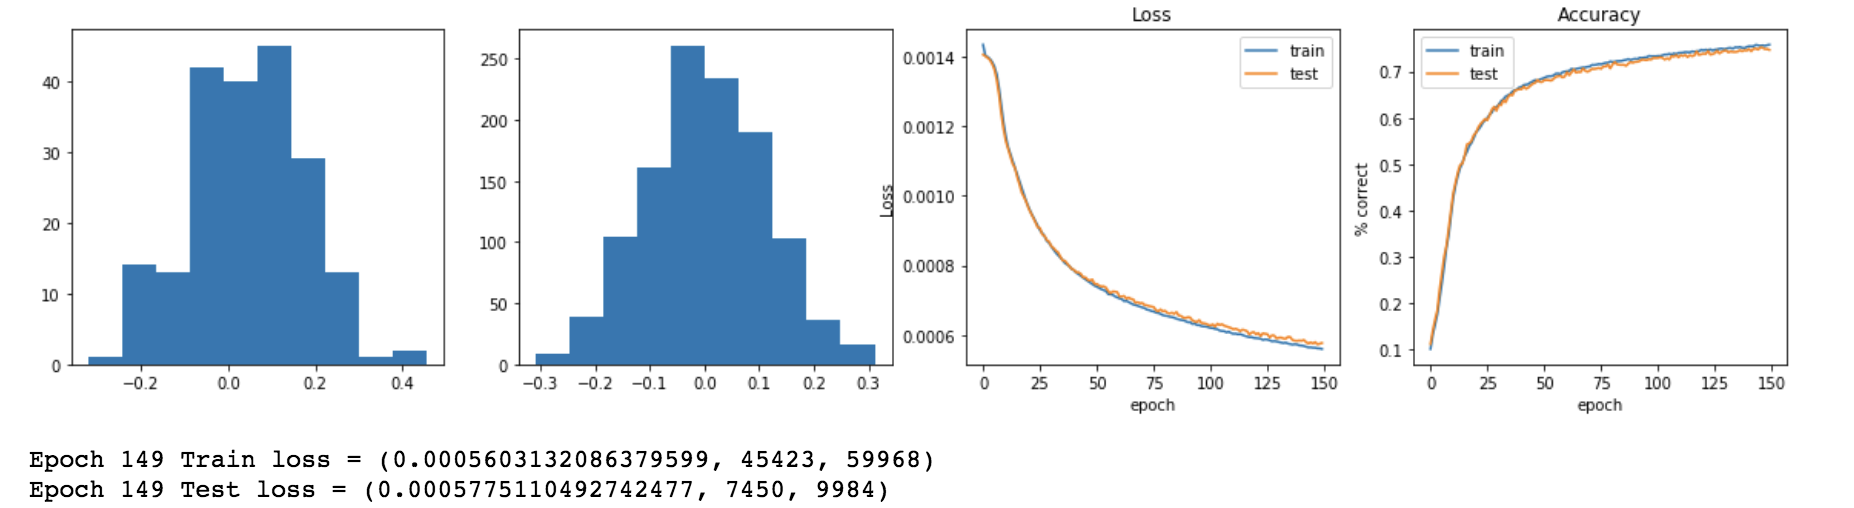

### CNN cross entropy loss
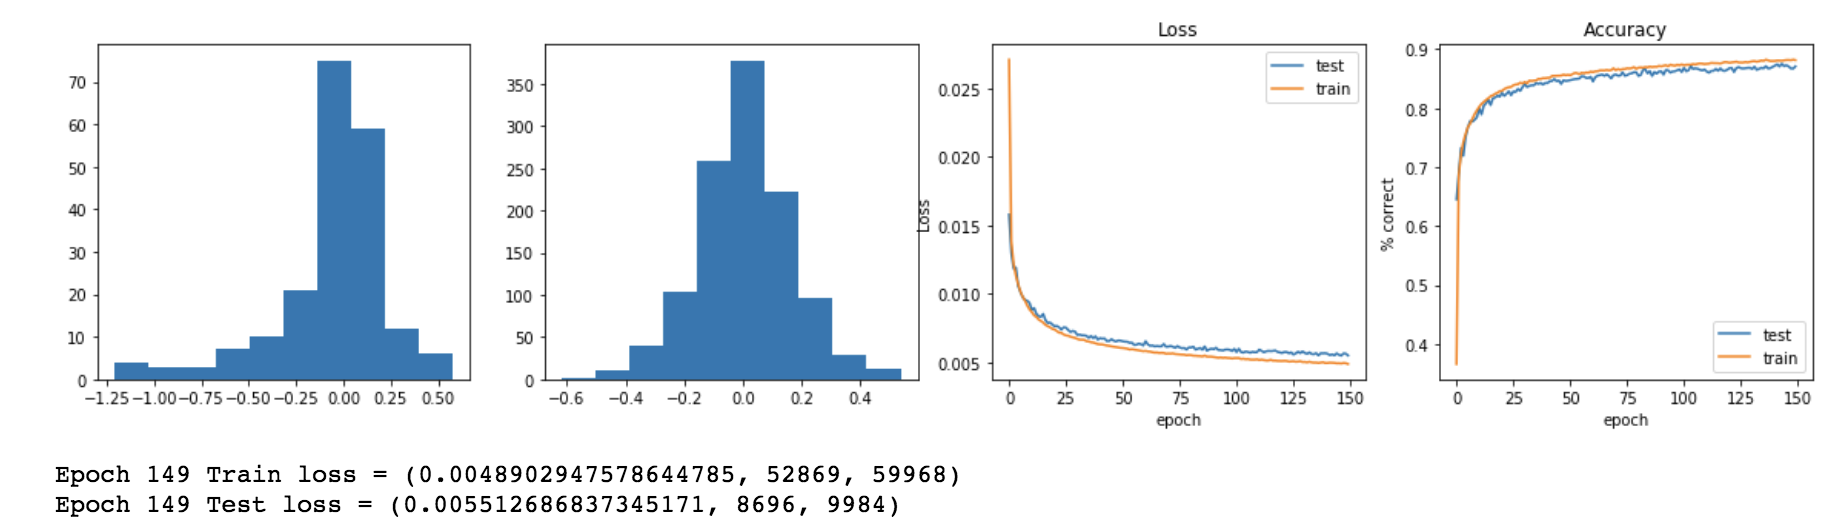

### FC Results

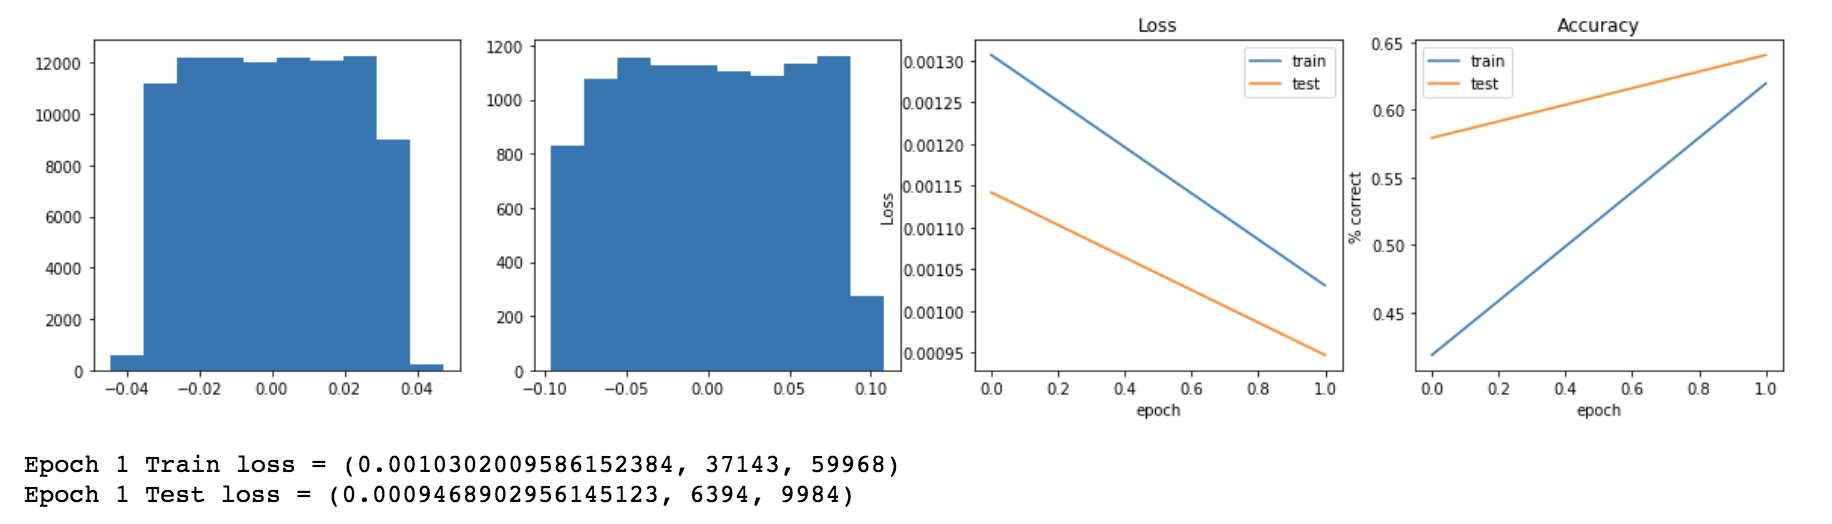

### After 120 epochs
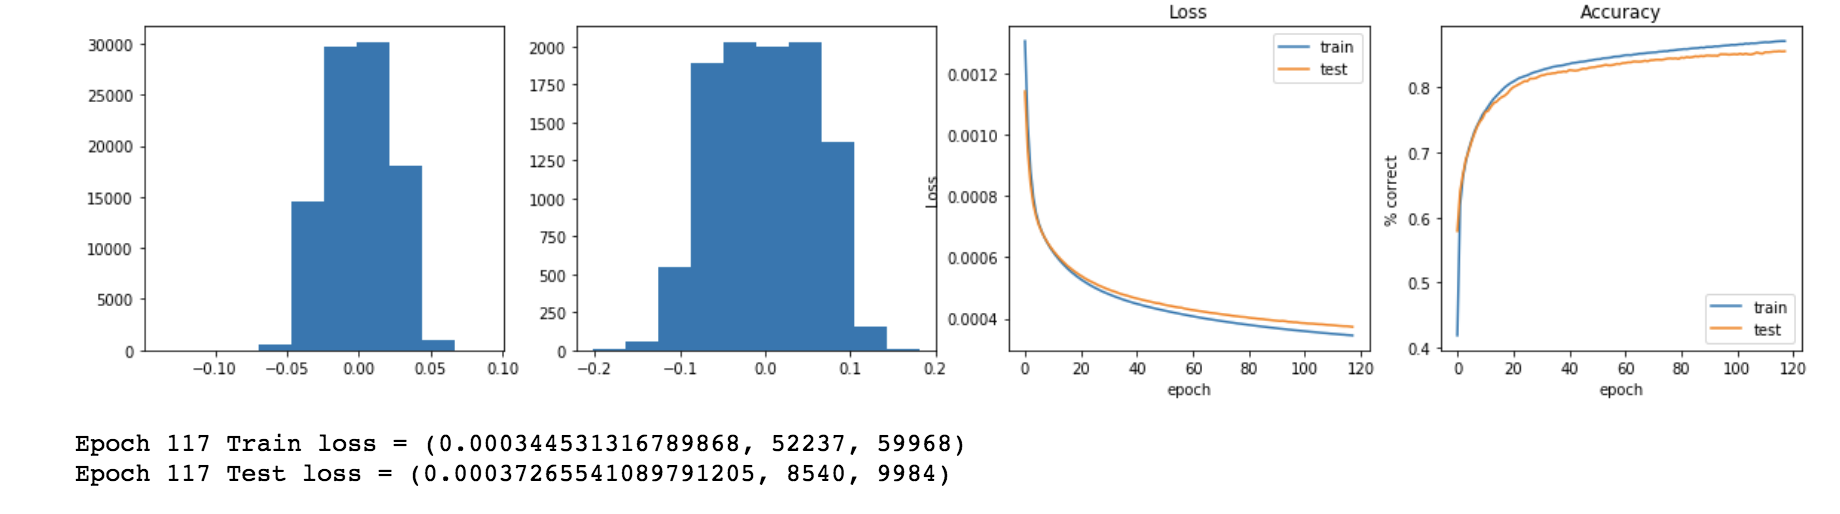

### After 300 epochs - after mse
```
Net(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
```
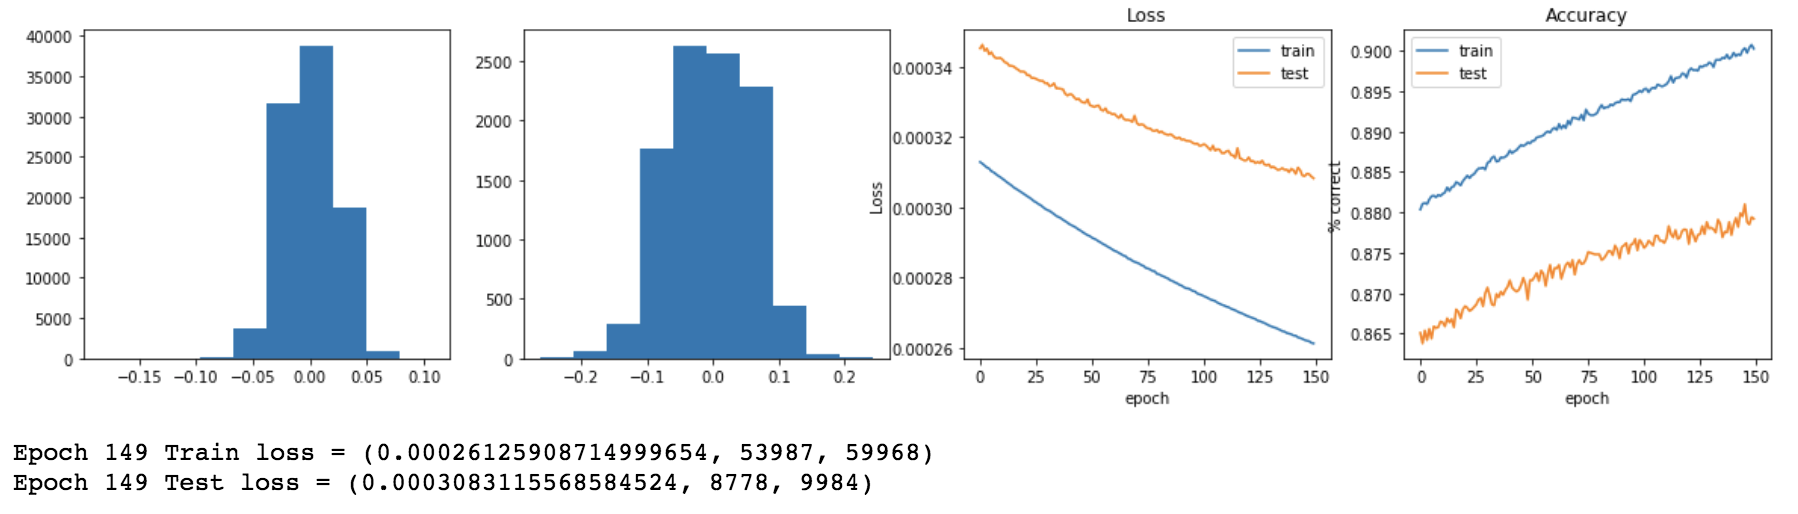

### FC after 150 epochs with cross-entropy
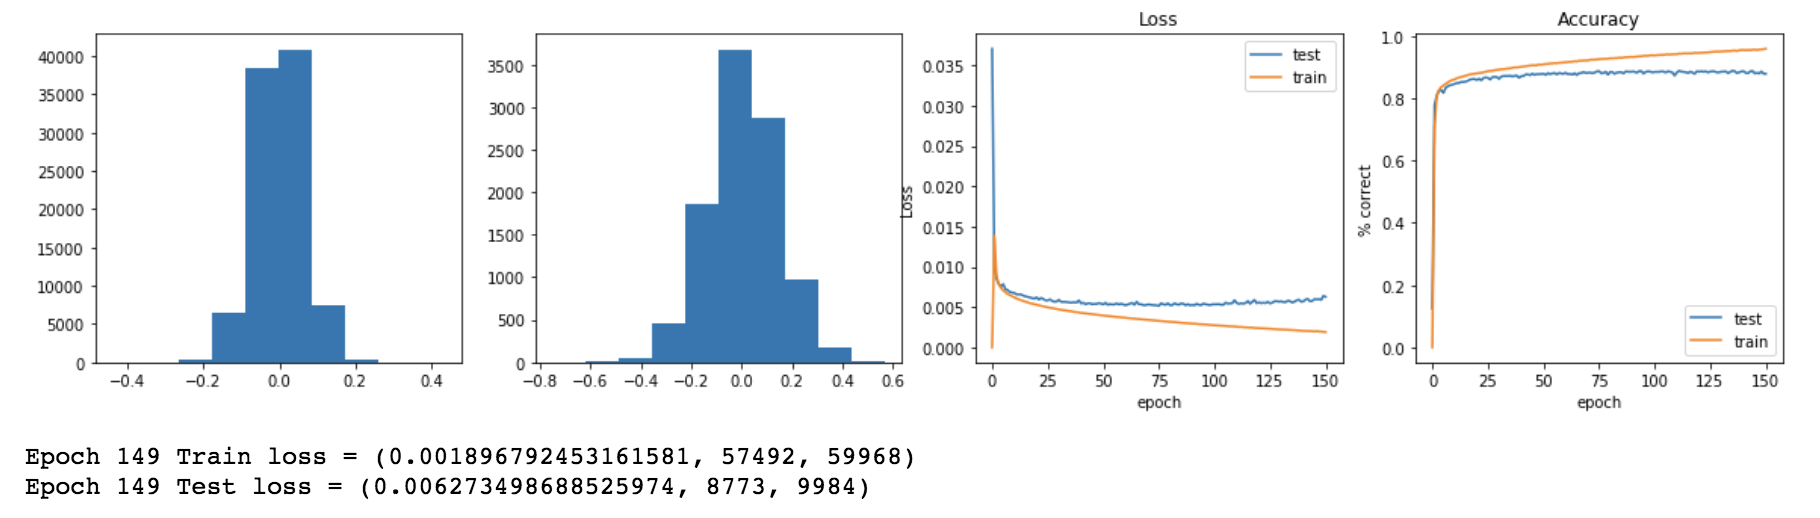